In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
import os

In [2]:
with open('out/SBMs_sparse_LapPE_BN/results/comparisonV0.json', 'r') as f:
    js = json.load(f)

In [10]:
js[160]

{'Data_Parameters': {'nb_clusters': 6,
  'size_min': 25,
  'size_max': 50,
  'p': 0.55,
  'q': 0.2,
  'nb_graphs_train': 1,
  'nb_graphs_test': 1000,
  'nb_graphs_val': 1},
 'Accuracy': 44.20347123059262,
 'spectral_clustering_accuracy': 0.9699018994707449}

In [11]:
n = 161

In [12]:
def snr(p,q,m):
    a = p*m
    b = q*m
    return (a-b)**2/(2*(a+b))

In [13]:
acc = []
spacc = []
snrs = []
for i in range(n):
    dp = js[i]["Data_Parameters"]
    acc.append(js[i]['Accuracy'])
    spacc.append(js[i]['spectral_clustering_accuracy']*100)
    m = (dp['size_min'] + dp['size_max'])*3
    snrs.append(snr(dp['p'], dp['q'], m))


In [14]:
from matplotlib.colors import Normalize

In [15]:
norma = Normalize()

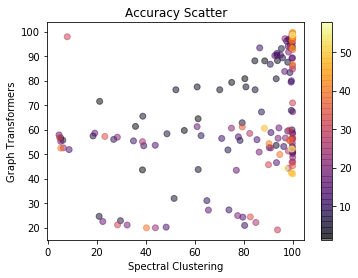

In [27]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('Accuracy Scatter')
ax.set_aspect('equal', adjustable='box')
im = ax.scatter(spacc, acc, c = snrs, label = snrs , cmap='inferno', norm=norma, alpha = 0.5)
ax.set_xlabel("Spectral Clustering")
ax.set_ylabel("Graph Transformers")
fig.colorbar(im, ax=ax)

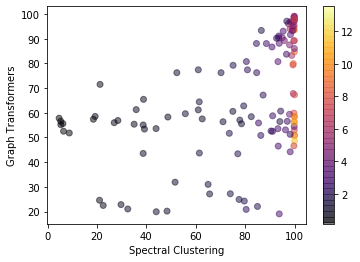

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
im = ax.scatter(spacc, acc, c = snrs, label = snrs , cmap='inferno', norm=norma, alpha = 0.5)
ax.set_xlabel("Spectral Clustering")
ax.set_ylabel("Graph Transformers")
fig.colorbar(im, ax=ax)


Text(0.5, 1.0, 'Performance as a function of SNR (Spectral clustering)')

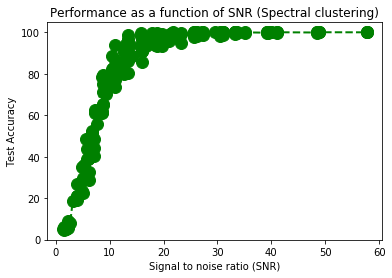

In [18]:

p = []
q = []
y = []
snrs = []
for i in range(n):
    dp = js[i]["Data_Parameters"]
    #p.append(dp['p']) 
    #q.append(dp['q'])
    y.append(js[i]['spectral_clustering_accuracy']*100)
    m = (dp['size_min'] + dp['size_max'])*3
    snrs.append(snr(dp['p'], dp['q'], m))
    
    

idx = sorted(range(len(snrs)), key=lambda k: snrs[k])
y = [y[i] for i in idx]
snrs = [snrs[i] for i in idx]
plt.plot(snrs,y,color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('Signal to noise ratio (SNR)')
plt.ylabel('Test Accuracy')
plt.title('Performance as a function of SNR (Spectral clustering)')

Text(0.5, 1.0, 'Performance as a function of SNR (Spectral clustering)')

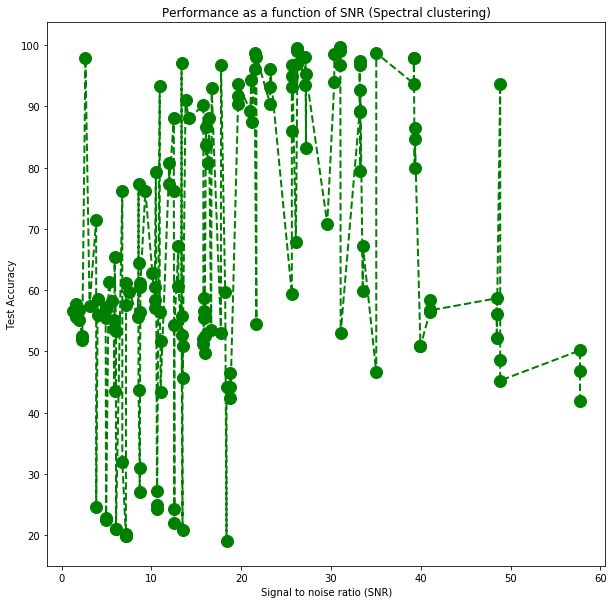

In [32]:

p = []
q = []
y = []
snrs = []
for i in range(n):
    dp = js[i]["Data_Parameters"]
    #p.append(dp['p']) 
    #q.append(dp['q'])
    y.append(js[i]['Accuracy'])
    m = (dp['size_min'] + dp['size_max'])*3
    snrs.append(snr(dp['p'], dp['q'], m))
    
    
idx = sorted(range(len(snrs)), key=lambda k: snrs[k])
y = [y[i] for i in idx]
snrs = [snrs[i] for i in idx]
plt.figure(figsize = (10,10))
plt.plot(snrs,y,color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('Signal to noise ratio (SNR)')
plt.ylabel('Test Accuracy')
plt.title('Performance as a function of SNR (Spectral clustering)')